Tutorial 06

1. Parse https://en.wikipedia.org/wiki/Lists_of_stars_by_constellation for the RA and Dec of stars of each constellation, convert these coordinates to Cartesian coordinates and store them by constellation and plot them using matplotlib.

2. Try to recreate the 'Moons_and_planets.csv' file(used in the first tutorial) from https://en.wikipedia.org/wiki/List_of_natural_satellites webpage. You can take inspiration from how tables are scraped in the get_map() function for Task 1. Do remember to remove commas and uncertainties in the radius measurement.

---------------------------------------------------------------------------------------------------------------------------

Part 1

Parse https://en.wikipedia.org/wiki/Lists_of_stars_by_constellation for the RA and Dec of stars of each constellation, convert these coordinates to Cartesian coordinates and store them by constellation and plot them using matplotlib.

In [1]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import math

In [2]:
page = requests.get("https://en.wikipedia.org/wiki/Lists_of_stars_by_constellation")
soup = BeautifulSoup(page.content, 'lxml')

In [3]:
soup.find_all('li') # After inspection, we find that the constellations lie within the 'li' tag

[<li class="mw-list-item" id="n-mainpage-description"><a accesskey="z" href="/wiki/Main_Page" title="Visit the main page [z]"><span>Main page</span></a></li>,
 <li class="mw-list-item" id="n-contents"><a href="/wiki/Wikipedia:Contents" title="Guides to browsing Wikipedia"><span>Contents</span></a></li>,
 <li class="mw-list-item" id="n-currentevents"><a href="/wiki/Portal:Current_events" title="Articles related to current events"><span>Current events</span></a></li>,
 <li class="mw-list-item" id="n-randompage"><a accesskey="x" href="/wiki/Special:Random" title="Visit a randomly selected article [x]"><span>Random article</span></a></li>,
 <li class="mw-list-item" id="n-aboutsite"><a href="/wiki/Wikipedia:About" title="Learn about Wikipedia and how it works"><span>About Wikipedia</span></a></li>,
 <li class="mw-list-item" id="n-contactpage"><a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia"><span>Contact us</span></a></li>,
 <li class="mw-list-item" id

In [4]:
print(soup.find_all('li')[67].get_text()) # First constellation in the list

Andromeda


In [5]:
print(soup.find_all('li')[154].get_text()) # Last constellation in the list

Vulpecula 


In [6]:
constellations = []
for element in soup.find_all('li')[67:155]:
    constellations.append(element.get_text())

print(constellations)
print(len(constellations))

['Andromeda', 'Antlia', 'Apus', 'Aquarius', 'Aquila', 'Ara', 'Aries', 'Auriga', 'Boötes', 'Caelum', 'Camelopardalis', 'Cancer', 'Canes Venatici', 'Canis Major', 'Canis Minor', 'Capricornus', 'Carina', 'Cassiopeia', 'Centaurus', 'Cepheus', 'Cetus', 'Chamaeleon', 'Circinus', 'Columba', 'Coma Berenices', 'Corona Australis', 'Corona Borealis', 'Corvus', 'Crater', 'Crux', 'Cygnus', 'Delphinus', 'Dorado', 'Draco', 'Equuleus', 'Eridanus', 'Fornax', 'Gemini', 'Grus', 'Hercules', 'Horologium', 'Hydra', 'Hydrus', 'Indus', 'Lacerta', 'Leo', 'Leo Minor', 'Lepus', 'Libra', 'Lupus', 'Lynx', 'Lyra', 'Mensa', 'Microscopium', 'Monoceros', 'Musca', 'Norma', 'Octans', 'Ophiuchus', 'Orion', 'Pavo', 'Pegasus', 'Perseus', 'Phoenix', 'Pictor', 'Pisces', 'Piscis Austrinus', 'Puppis', 'Pyxis', 'Reticulum', 'Sagitta', 'Sagittarius', 'Scorpius', 'Sculptor', 'Scutum', 'Serpens', 'Sextans', 'Taurus', 'Telescopium', 'Triangulum', 'Triangulum Australe', 'Tucana', 'Ursa Major', 'Ursa Minor', 'Vela', 'Virgo', 'Volans'

In [7]:
import re # We import re module to use regular expressions (regex) for extracting numerical values from strings.

def get_coords(ra_s, dec_s):
    # Extract RA components
    ra_match = re.match(r"\s*(\d+)\s*h\s*(\d+)\s*m\s*([\d.]+)\s*s\s*", ra_s) # (\d+)h looks for digits before h and so on.
    if not ra_match:
        raise ValueError(f"Invalid RA format: {ra_s}")
    
    h, m, s = map(float, ra_match.groups())
    ra = h + m / 60 + s / 3600

    # Extract Dec components
    dec_match = re.match(r"\s*([+\--]?\d+)\s*°\s*(\d+)\s*′\s*([\d.]+)\s*″\s*", dec_s)
    if not dec_match:
        raise ValueError(f"Invalid Dec format: {dec_s}")
    
    #d_str, m_str, s_str = dec_match.groups()
    #d_str = d_str.strip()
    #d_str = re.sub(r'[--]', '-', d_str)
    
    d, m, s = map(float, dec_match.groups())
    dec = d + (m / 60) + (s / 3600)

    return ra, dec


The above function "get_coords()" converts RA and Dec from string formats like "12h34m56s" and "+12°34′56″" into decimal degrees.

In [8]:
# Example

ra_s = " 00 h 08 m 23.17 s " # Caution: The get_coords() function is sensitive to blankspaces in between the coordinates.
# E.g. "00h08m23.17s" will work but "00h 08m 23.17s" won't. To solve this, \s* is added before and after every digit and h
# or m or s. \s* handles optional spaces
dec_s = "-08° 12′ 05.9″"
# "-08° 12′ 05.9″"

ra, dec = get_coords(ra_s, dec_s)
print((ra, dec))


(0.13976944444444445, -7.798361111111111)


In [9]:
'''
def get_map(constellation):
    url = f'https://en.wikipedia.org/wiki/List_of_stars_in_{constellation}' #page gets downloaded according to constellation
    r = requests.get(url)

    soup = BeautifulSoup(r.content, 'lxml')  #Here, the lxml parser is used instead of HTML parser

    tab = soup.find_all('table', attrs={'class':'wikitable sortable sticky-header'})[0]   #To extract information from a wikipedia table

    if not tab:
        raise ValueError("No suitable table found on Wikipedia page.")
        tab = tables[0]
                               
    data = [[]]
    for i in tab.find_all('tr'):   # searching in each row of the table ( 'tr' tag stands for row)
        row = []                    # declaring empty row
        for j in i.find_all('td'):  #'td' tag stands for a cell
            row.append(j.get_text())   # add the text contents of each row to the list
        data.append(row)

    heads = []
    for i in tab.find_all('tr')[:1]:
        for j in i.find_all('th'):             #'th' tag stands for header cell
            heads.append(j.get_text().strip('\n'))

    name_ind = heads.index('Name')
    ra_ind = heads.index('RA')
    dec_ind = heads.index('Dec')
                                  
    mag_ind = heads.index('vis.mag.')
    
    name = []
    ra = []
    dec = []
    mag = []
    for i in data[2:-2]:
        name_string = i[name_ind]
        try:                                             #The code first tries to run the code inside try
            ra_string = i[ra_ind].replace('\xa0', '')
            dec_string = i[dec_ind].replace('\xa0', '')   #These are code used to format the data
            mag_string = i[mag_ind]                       
            if mag_string[0]=='−':
                mag_string = '-'+mag_string[1:]
        except:                                       #If any error gets thrown up, it will execute the code inside except
            continue
        try:
            ra_i, dec_i = get_coords(ra_string, dec_string)     #convert ra dec from string to float
        except:
            continue
        try:
            mag.append(float(mag_string))
            name.append(name_string)
            ra.append(ra_i)
            dec.append(dec_i)
        except:
            continue

    name = np.array(name)
    ra = np.array(ra)
    dec = np.array(dec)
    mag = np.array(mag)
    return name, ra, dec, mag


print(get_map('Andromeda'))'
'''

'\ndef get_map(constellation):\n    url = f\'https://en.wikipedia.org/wiki/List_of_stars_in_{constellation}\' #page gets downloaded according to constellation\n    r = requests.get(url)\n\n    soup = BeautifulSoup(r.content, \'lxml\')  #Here, the lxml parser is used instead of HTML parser\n\n    tab = soup.find_all(\'table\', attrs={\'class\':\'wikitable sortable sticky-header\'})[0]   #To extract information from a wikipedia table\n\n    if not tab:\n        raise ValueError("No suitable table found on Wikipedia page.")\n        tab = tables[0]\n                               \n    data = [[]]\n    for i in tab.find_all(\'tr\'):   # searching in each row of the table ( \'tr\' tag stands for row)\n        row = []                    # declaring empty row\n        for j in i.find_all(\'td\'):  #\'td\' tag stands for a cell\n            row.append(j.get_text())   # add the text contents of each row to the list\n        data.append(row)\n\n    heads = []\n    for i in tab.find_all(\'tr\')

In [10]:
def get_map(constellation):           #The get_map() that does not skip stars
    url = f'https://en.wikipedia.org/wiki/List_of_stars_in_{constellation}'
    r = requests.get(url)

    soup = BeautifulSoup(r.content, 'lxml')

    tab = soup.find_all('table', attrs={'class':'wikitable sortable sticky-header'})[0]

    data = [[]]
    for i in tab.find_all('tr'):
        row = []
        for j in i.find_all('td'):
            row.append(j.get_text())
        data.append(row)

    heads = []
    for i in tab.find_all('tr')[:1]:
        for j in i.find_all('th'):
            heads.append(j.get_text().strip('\n'))

    name_ind = heads.index('Name')
    ra_ind = heads.index('RA')
    dec_ind = heads.index('Dec')

    mag_ind = heads.index('vis.mag.')

    name = []
    ra = []
    dec = []
    mag = []
    for i in data[2:-2]:
        name_string = i[name_ind]
        
        if i[ra_ind] != '' and i[dec_ind] != '' and i[mag_ind] != '' and i[ra_ind] != ' ' and i[dec_ind] != ' ' and i[mag_ind] != ' ' and i[mag_ind][0] != 'n':
            ra_string = i[ra_ind].replace('\xa0', '')
            dec_string = i[dec_ind].replace('\xa0', '')
            mag_string = i[mag_ind]
            if mag_string[0]=='−':
                mag_string = '-'+mag_string[1:]
            if mag_string[0]=='~':
                mag_string = mag_string[1:]
            mag_str = mag_string[0]
            for c in mag_string[1:]:
                if ord(c) > 45 and ord(c) < 59:
                    mag_str += c
                else:
                    break
            i = mag_string.find('.')
            mag_string = mag_string[:(i+3)]
            if name_string == '':
                name_string = "No name"

            
                                
            ra_i, dec_i = get_coords(ra_string, dec_string)
            mag.append(float(mag_str))
            name.append(name_string)
            ra.append(ra_i)
            dec.append(dec_i)

    df = pd.DataFrame({'Name': name, 'RA': ra, 'Dec': dec, 'Magnitude': mag})
    return df

constellation_name = 'Andromeda'
df = get_map(constellation_name)
print(df)


                 Name         RA        Dec  Magnitude
0           Alpheratz   0.139769  29.090833       2.07
1              Mirach   1.162167  35.620833       2.07
2              γ1 And   2.064978  42.329861       2.10
3               δ And   0.655444  30.861222       3.27
4    Andromeda Galaxy   0.712308  41.269278       3.44
..                ...        ...        ...        ...
174            WASP-1   0.344467  31.989944      11.79
175          Ross 248  23.698608  44.178000      12.29
176          HAT-P-19   0.634444  34.711667      12.90
177          HAT-P-28   0.866667  34.728333      13.03
178          HAT-P-53   1.458056  38.968056      13.73

[179 rows x 4 columns]


---------------------------------------------------------------------------------------------------------------------------

Stereographic Projections

- Projection of a sphere through a specific point (say, north pole) on the sphere onto a plane perpendicular to the diameter through the point on the sphere.<br>
<br>
<br>
<div style="display: flex; justify-content: center;">
    <img src="StereographicProjection_1000.jpg" alt="Stereographic Projection" width="400">
    <img src="Stereo_proj.jpg" alt="Stereographic Projection" width="500">
</div>

- Procedure to convert RA and Dec into stereographic projections:
    1. RA --> $\theta$ & Dec --> 90-$\phi$ in spherical coordinates. RA and Dec converted to radians.
    2. Formula for the projection onto z=0 plane i.e. (X, Y) given by,<br>\
    <img src="(X_Y).jpg" alt="Stereographic Projection formula" width="300"><br>
    3. In the formula the values of x, y and z (r = 1) are given as,<br>\
    <img src="Spherical_to_cartesian.jpg" alt="Spherical_to_cartesian" width="500">

---------------------------------------------------------------------------------------------------------------------------

In [11]:
ra_mean = df['RA'].mean() # ra_mean is now a scalar value instead of a function like dec.mean() in
# theta = np.deg2rad(90-dec + dec.mean()). No need to add () next to ra_mean and dec_mean.
dec_mean = df['Dec'].mean()

def stereo_proj(ra, dec, ra_mean, dec_mean):
    theta = np.deg2rad(90-dec + dec_mean)
    phi = np.deg2rad((ra - ra_mean)*15)
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    X = x/(1-z)
    Y = y/(1-z)
    return X, Y

In [12]:
df[['X', 'Y']] = df.apply(lambda row: pd.Series(stereo_proj(row['RA'], row['Dec'], ra_mean, dec_mean)), axis=1)
# Each row’s RA and Dec values are individual , not arrays while using .apply(axis = 1), so they don't have
# a .mean() method.
df.to_csv(f"{constellation_name}.csv", index=False)
df

,Name,RA,Dec,Magnitude,X,Y
0,Alpheratz,0.139769,29.090833,2.07,-0.246334,-0.774670
1,Mirach,1.162167,35.620833,2.07,-0.036673,-0.911505
2,γ1 And,2.064978,42.329861,2.10,0.199897,-1.006034
3,δ And,0.655444,30.861222,3.27,-0.144297,-0.826376
4,Andromeda Galaxy,0.712308,41.269278,3.44,-0.158412,-0.994348
...,...,...,...,...,...,...
174,WASP-1,0.344467,31.989944,11.79,-0.215280,-0.828282
175,Ross 248,23.698608,44.178000,12.29,-0.435222,-0.965826
176,HAT-P-19,0.634444,34.711667,12.90,-0.159294,-0.883566
177,HAT-P-28,0.866667,34.728333,13.03,-0.105347,-0.891873


- .apply() applies the function stereo_proj() to each row or column (axis=1 ensure it is applied row-wise).
- lambda function takes a row of the DataFrame as input, extracts RA and Dec from the row and passes to stereo_proj()
to get (r, theta) tuple as output.
- pd.Series(stereo_proj(row['RA'], row['Dec'])) converts tuple into pandas series and
stored as spearate columns.

In [13]:
def plot(constellation, return_data = False, orientation=0, norm=50, **kwargs):
    name = df['Name']
    mag = df['Magnitude']
    x = df['X']
    y = df['Y']
    s = 10**(-mag/2.5)
    if norm!=None:
        s = s/s.max()*norm
    if 'figure' not in kwargs:
        plt.figure(figsize=(10,10))
    plt.gca().set_facecolor('k')
    if 'color' not in kwargs:
        kwargs['color'] = 'w'
    if orientation == 0:
        plt.scatter(x, y, s=s, **kwargs)
    elif orientation == 1:
        plt.scatter(-y, x, s=s, **kwargs)
    elif orientation == 2:
        plt.scatter(-x, -y, s=s, **kwargs)
    elif orientation == 3:
        plt.scatter(y, -x, s=s, **kwargs)
    plt.xticks([])
    plt.yticks([])
    plt.title(constellation_name)
    if return_data:
        return name, ra, dec, mag, s

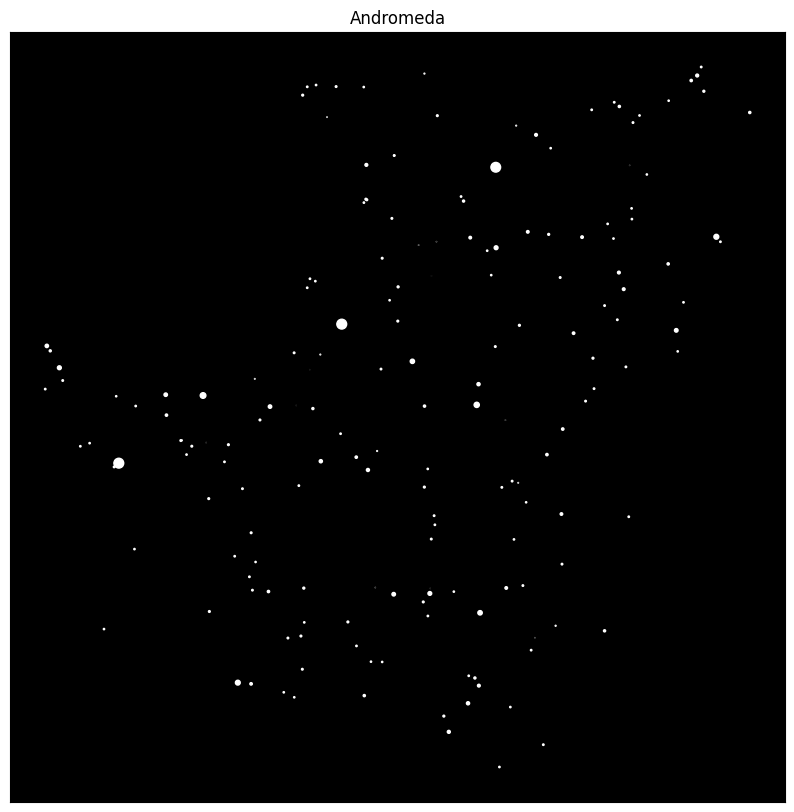

In [14]:
plot(constellation_name , orientation=1)

---------------------------------------------------------------------------------------------------------------------------

Part 2

Try to recreate the 'Moons_and_planets.csv' file(used in the first tutorial) from https://en.wikipedia.org/wiki/List_of_natural_satellites webpage. You can take inspiration from how tables are scraped in the get_map() function for Task 1. Do remember to remove commas and uncertainties in the radius measurement.

In [15]:
url = f'https://en.wikipedia.org/wiki/List_of_natural_satellites'
r = requests.get(url)

soup = BeautifulSoup(r.content, 'lxml')
tab = soup.find_all('table', attrs={'class':'wikitable sortable'})[0]

In [16]:
req_indices = [0, 2, 5]
data_all = [[]]
for i in tab.find_all('tr')[1:]:
    row = []
    for j in i.find_all('td'):
        row.append(j.get_text().strip('\n'))
    data_all.append(row)
    data = []
    for i in data_all[1:]:
        row = []
        for j in req_indices:
            row.append(i[j])
        data.append(row)

data

[['Moon', 'Earth', '1,738'],
 ['Phobos', 'Mars', '11.267'],
 ['Deimos', 'Mars', '6.2±0.18'],
 ['Io', 'Jupiter', '1,821.6±0.5'],
 ['Europa', 'Jupiter', '1,560.8±0.5'],
 ['Ganymede', 'Jupiter', '2,634.1±0.3'],
 ['Callisto', 'Jupiter', '2,410.3±1.5'],
 ['Amalthea', 'Jupiter', '83.5±2'],
 ['Himalia', 'Jupiter', '69.8'],
 ['Elara', 'Jupiter', '39.95'],
 ['Pasiphae', 'Jupiter', '28.9'],
 ['Sinope', 'Jupiter', '17.5'],
 ['Lysithea', 'Jupiter', '21.1'],
 ['Carme', 'Jupiter', '23.3'],
 ['Ananke', 'Jupiter', '14.55'],
 ['Leda', 'Jupiter', '10.75'],
 ['Thebe', 'Jupiter', '49.3±2.0'],
 ['Adrastea', 'Jupiter', '8.2±2.0'],
 ['Metis', 'Jupiter', '21.5±2.0'],
 ['Callirrhoe', 'Jupiter', '4.8'],
 ['Themisto', 'Jupiter', '4.5'],
 ['Megaclite', 'Jupiter', '2.7'],
 ['Taygete', 'Jupiter', '2.5'],
 ['Chaldene', 'Jupiter', '1.9'],
 ['Harpalyke', 'Jupiter', '2.2'],
 ['Kalyke', 'Jupiter', '3.45'],
 ['Iocaste', 'Jupiter', '2.6'],
 ['Erinome', 'Jupiter', '1.6'],
 ['Isonoe', 'Jupiter', '1.9'],
 ['Praxidike', 'Jupi

In [17]:
data_cleaned = []
pattern = r"(?:±|<|≈).*" 
for row in data:
    value = row[2]
    # If the value is one of the exceptions, don't change it
    if value == "≈87.5" or value == "<100[167]":
        cleaned_value = value
    else:
        cleaned_value = re.sub(pattern, "", value).strip()
    data_cleaned.append(cleaned_value)

print(data_cleaned)
print(len(data_cleaned))

['1,738', '11.267', '6.2', '1,821.6', '1,560.8', '2,634.1', '2,410.3', '83.5', '69.8', '39.95', '28.9', '17.5', '21.1', '23.3', '14.55', '10.75', '49.3', '8.2', '21.5', '4.8', '4.5', '2.7', '2.5', '1.9', '2.2', '3.45', '2.6', '1.6', '1.9', '3.5', '2', '2', '2', '1.5', '1.5', '1.5', '1', '1', '1', '1', '1', '1.5', '1', '2', '1', '1.5', '1', '2', '1.5', '2', '1', '1', '1', '1', '0.5', '2', '1', '1', '0.5', '2', '1', '2', '1', '1', '0.5', '1', '1', '1.5', '1', '1', '1', '0.5', '1', '1.5', '0.5', '1', '1', '0.5', '1', '0.5', '1', '1', '1.5', '1.5', '1', '1', '2', '2', '1.5', '0.5', '1', '0.5', '0.5', '1', '0.5', '1', '0.5', '0.5', '0.5', '0.5', '198.2', '252.1', '533.1', '561.4', '763.8', '2,574.73', '135', '735.6', '106.5', '89.5', '58.1', '17.6', '12.4', '10.7', '15.1', '43.1', '40.7', '14.1', '11', '14.5', '7.5', '6', '3.5', '8', '3.5', '14.3', '4', '5', '19.65', '3.5', '3.5', '1.45', '2.22', '1.3', '3.8', '3', '3', '3', '3.5', '2.5', '2', '3', '3', '4', '3.5', '3', '3', '3', '0.9', '3'

In [18]:

sublist = [row[:2] for row in data]
data_updated = [inner_list + [data_cleaned[i]] for i, inner_list in enumerate(sublist)]
data_updated

[['Moon', 'Earth', '1,738'],
 ['Phobos', 'Mars', '11.267'],
 ['Deimos', 'Mars', '6.2'],
 ['Io', 'Jupiter', '1,821.6'],
 ['Europa', 'Jupiter', '1,560.8'],
 ['Ganymede', 'Jupiter', '2,634.1'],
 ['Callisto', 'Jupiter', '2,410.3'],
 ['Amalthea', 'Jupiter', '83.5'],
 ['Himalia', 'Jupiter', '69.8'],
 ['Elara', 'Jupiter', '39.95'],
 ['Pasiphae', 'Jupiter', '28.9'],
 ['Sinope', 'Jupiter', '17.5'],
 ['Lysithea', 'Jupiter', '21.1'],
 ['Carme', 'Jupiter', '23.3'],
 ['Ananke', 'Jupiter', '14.55'],
 ['Leda', 'Jupiter', '10.75'],
 ['Thebe', 'Jupiter', '49.3'],
 ['Adrastea', 'Jupiter', '8.2'],
 ['Metis', 'Jupiter', '21.5'],
 ['Callirrhoe', 'Jupiter', '4.8'],
 ['Themisto', 'Jupiter', '4.5'],
 ['Megaclite', 'Jupiter', '2.7'],
 ['Taygete', 'Jupiter', '2.5'],
 ['Chaldene', 'Jupiter', '1.9'],
 ['Harpalyke', 'Jupiter', '2.2'],
 ['Kalyke', 'Jupiter', '3.45'],
 ['Iocaste', 'Jupiter', '2.6'],
 ['Erinome', 'Jupiter', '1.6'],
 ['Isonoe', 'Jupiter', '1.9'],
 ['Praxidike', 'Jupiter', '3.5'],
 ['Autonoe', 'Jupiter

In [19]:
headers = [['Name of Moon', 'Name of Planet', 'Mean Radius (km)']]
Moons_and_planets = headers + data_updated
Moons_and_planets

[['Name of Moon', 'Name of Planet', 'Mean Radius (km)'],
 ['Moon', 'Earth', '1,738'],
 ['Phobos', 'Mars', '11.267'],
 ['Deimos', 'Mars', '6.2'],
 ['Io', 'Jupiter', '1,821.6'],
 ['Europa', 'Jupiter', '1,560.8'],
 ['Ganymede', 'Jupiter', '2,634.1'],
 ['Callisto', 'Jupiter', '2,410.3'],
 ['Amalthea', 'Jupiter', '83.5'],
 ['Himalia', 'Jupiter', '69.8'],
 ['Elara', 'Jupiter', '39.95'],
 ['Pasiphae', 'Jupiter', '28.9'],
 ['Sinope', 'Jupiter', '17.5'],
 ['Lysithea', 'Jupiter', '21.1'],
 ['Carme', 'Jupiter', '23.3'],
 ['Ananke', 'Jupiter', '14.55'],
 ['Leda', 'Jupiter', '10.75'],
 ['Thebe', 'Jupiter', '49.3'],
 ['Adrastea', 'Jupiter', '8.2'],
 ['Metis', 'Jupiter', '21.5'],
 ['Callirrhoe', 'Jupiter', '4.8'],
 ['Themisto', 'Jupiter', '4.5'],
 ['Megaclite', 'Jupiter', '2.7'],
 ['Taygete', 'Jupiter', '2.5'],
 ['Chaldene', 'Jupiter', '1.9'],
 ['Harpalyke', 'Jupiter', '2.2'],
 ['Kalyke', 'Jupiter', '3.45'],
 ['Iocaste', 'Jupiter', '2.6'],
 ['Erinome', 'Jupiter', '1.6'],
 ['Isonoe', 'Jupiter', '1.9']

In [20]:
Moons_and_planets_df = pd.DataFrame(data_updated, columns=["Name of Moon", "Name of Planet", "Mean Radius (km)"])
Moons_and_planets_df

,Name of Moon,Name of Planet,Mean Radius (km)
0,Moon,Earth,"1,738"
1,Phobos,Mars,11.267
2,Deimos,Mars,6.2
3,Io,Jupiter,"1,821.6"
4,Europa,Jupiter,"1,560.8"
...,...,...,...
425,Namaka,II (2),"25,657"
426,Weywot,Quaoar,40.5
427,S/2015 (136472) 1,Makemake,≈87.5
428,Xiangliu,Gonggong,
